In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import gaussian_process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared, DotProduct, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
import sklearn.decomposition
import sklearn.metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('./Weather.csv', dtype={"Snowfall":object, "PoorWeather":object, "SNF": object, "TSHDSBRSGF":object})

In [3]:
dataset['Precip'] = pd.to_numeric(dataset['Precip'], errors='coerce')                                
dataset = dataset.fillna(0)
dataset.shape
print (dataset.head(40))

      STA       Date  Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0   10001   1942-7-1   1.016          0.0  25.555556  22.222222  23.888889   
1   10001   1942-7-2   0.000          0.0  28.888889  21.666667  25.555556   
2   10001   1942-7-3   2.540          0.0  26.111111  22.222222  24.444444   
3   10001   1942-7-4   2.540          0.0  26.666667  22.222222  24.444444   
4   10001   1942-7-5   0.000          0.0  26.666667  21.666667  24.444444   
5   10001   1942-7-6   0.000          0.0  26.666667  21.666667  24.444444   
6   10001   1942-7-7   0.000          0.0  28.333333  22.777778  25.555556   
7   10001   1942-7-8   3.556          0.0  26.666667  22.222222  24.444444   
8   10001   1942-7-9   0.000          0.0  27.222222  22.777778  25.000000   
9   10001  1942-7-10   3.556          0.0  25.555556  21.666667  23.333333   
10  10001  1942-7-11   0.000          0.0  25.555556  21.666667  23.333333   
11  10001  1942-7-12   0.508          0.0  24.444444  22.222222 

In [4]:
dataset.describe()

,STA,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,...,119040.0,119040.0,119040.0,119040.0,119040.000000,119040.0,119040.0,119040.0,119040.0,119040.0
mean,29659.435795,3.225612,0.168818,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,0.120884,...,0.0,0.0,0.0,0.0,0.053300,0.0,0.0,0.0,0.0,0.0
std,20953.209402,10.801044,2.611819,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,2.069915,...,0.0,0.0,0.0,0.0,0.886512,0.0,0.0,0.0,0.0,0.0
min,10001.000000,0.000000,0.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11801.000000,0.000000,0.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,22508.000000,0.000000,0.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,33501.000000,0.762000,0.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,82506.000000,307.340000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,...,0.0,0.0,0.0,0.0,23.900000,0.0,0.0,0.0,0.0,0.0


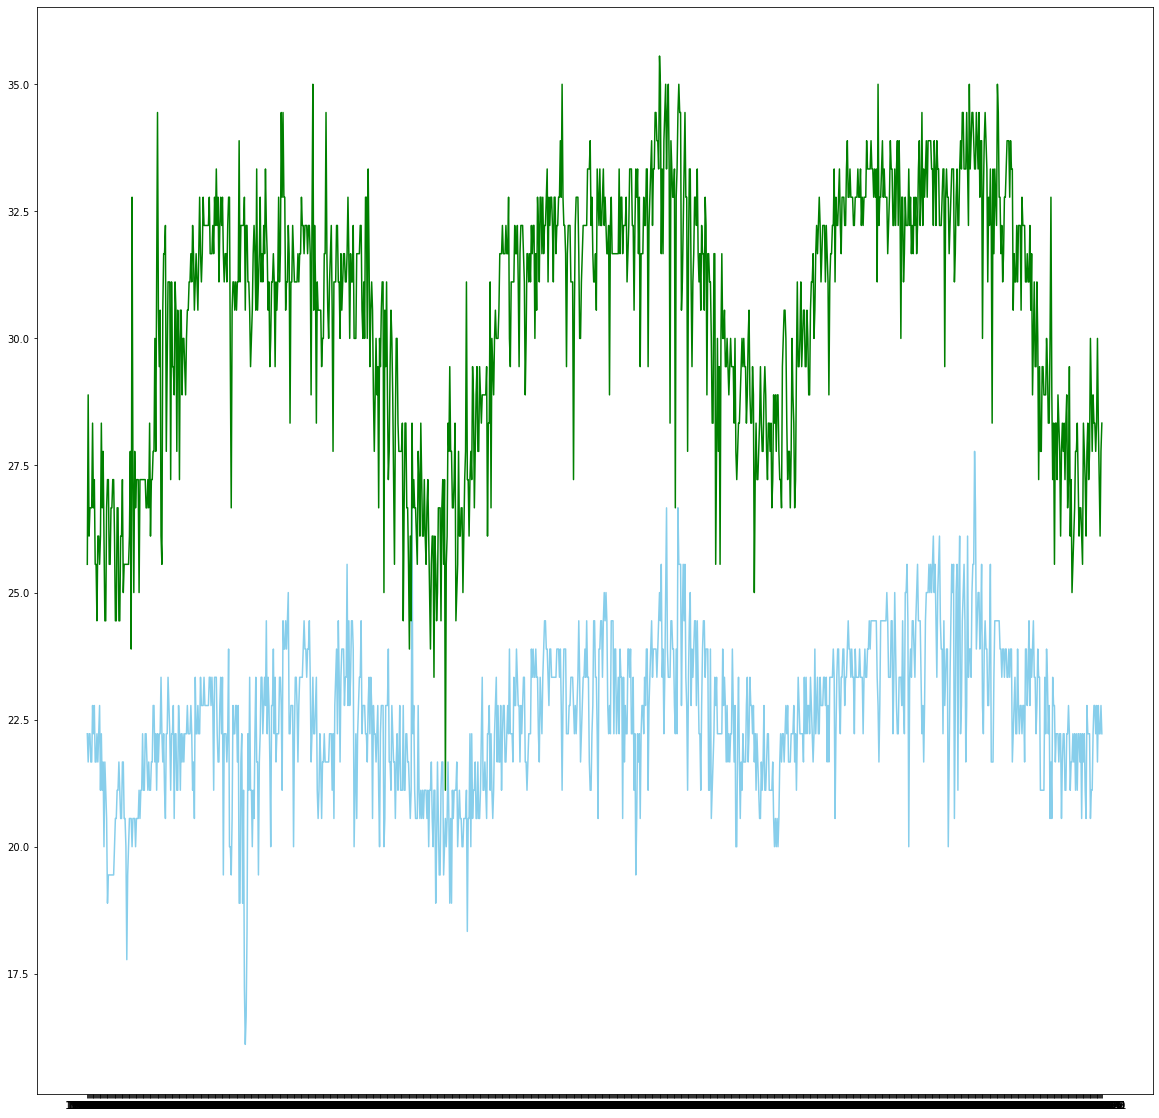

In [5]:
df2 = dataset[['STA', 'Date','MinTemp','MaxTemp']]
df2 = df2[(df2['STA'] == 10001)]
dft = df2[~(df2['MinTemp'] > df2['MaxTemp'])]

fig1 = plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(111)
ax1.plot('Date', 'MinTemp', data=dft.head(3000), label=1, color='skyblue')
ax1.plot('Date', 'MaxTemp', data=dft.head(3000), label=2, color='green')

#dft.plot(x='Date', y='MinTemp', secondary_y='MaxTemp',  cmap = cm.coolwarm, style='o',figsize=(10,87))
plt.show()

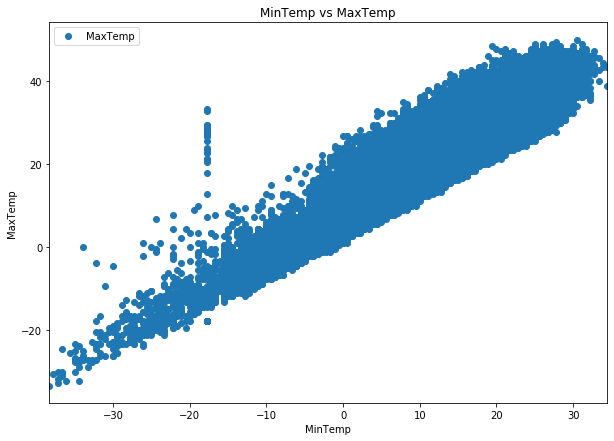

In [6]:
df1 = dataset[['MinTemp','MaxTemp']]
df1 = df1[~(df1['MinTemp'] > df1['MaxTemp'])]  # strip rows where MinTemp > MaxTemp
df1.plot(x='MinTemp', y='MaxTemp', style='o',figsize=(10,7))
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [7]:
#prepare data, sort by minimal temperature and turn X,y into a function
df1 = dataset[['STA', 'MinTemp','Precip','MaxTemp']]
df1 = df1[(df1['STA'] == 10001)]  # train on a single station
df1 = df1[~(df1['MinTemp'] > df1['MaxTemp'])]  # strip rows where MinTemp > MaxTemp

df = df1[['MinTemp', 'Precip', 'MaxTemp']]
#just take the first 1000 values - the full dataset takes way too much memory
#X = dfs['MinTemp'].head(1000).values.reshape(-1,1)
#y = dfs['MaxTemp'].head(1000).values.reshape(-1,1)
X = df.values[:,0:-1]
y = df.values[:,2]
#X_train = df.head(3000).values[:,0:-1]
#y_train = df.head(3000).values[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (y)

[25.55555556 28.88888889 26.11111111 ... 26.11111111 27.77777778
 28.33333333]


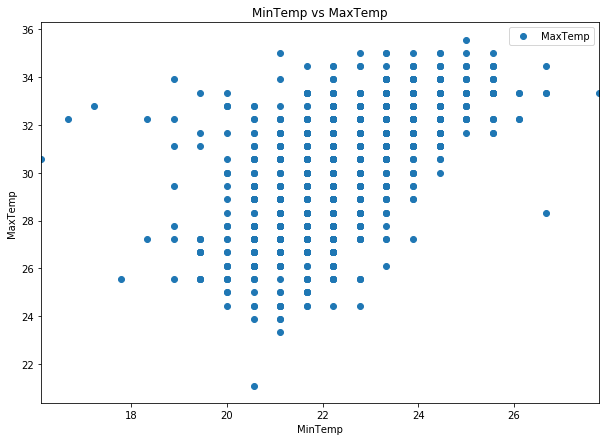

In [8]:
df.plot(x='MinTemp', y='MaxTemp', style='o',figsize=(10,7))
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [9]:
np.random.seed(1)

#Predict max temp from min temp and precipitation
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
kernel = RBF(1, (1e-1, 1e2))
#kernel = C(1.0, (1e-3, 1e3)) * ExpSineSquared()
gp = GaussianProcessRegressor(kernel=kernel, alpha = 1e-3, n_restarts_optimizer=9)

gp.fit(X_train, y_train)

print (gp.score(X_train, y_train))

y_pred, sigma = gp.predict(X, return_std=True)

0.5824587228897682


In [10]:
print (sigma)

[0.0164361  0.00389163 0.01408361 ... 0.02231199 0.00322716 0.00278392]


In [11]:
print (X[:,1].shape)
dfnew = pd.DataFrame({'MinTemp': X[:,0], 'Precip': X[:,1], 'MaxTemp': y[:], 'MaxPred': y_pred})
#dfnew = pd.DataFrame({ 'MaxTemp': y.reshape(len(y),), 'MaxPred': y_pred.reshape(len(y_pred),)})
y_predT, sigma = gp.predict(X_train, return_std=True)
#print (sigma)
print (y[:])

(1157,)
[25.55555556 28.88888889 26.11111111 ... 26.11111111 27.77777778
 28.33333333]


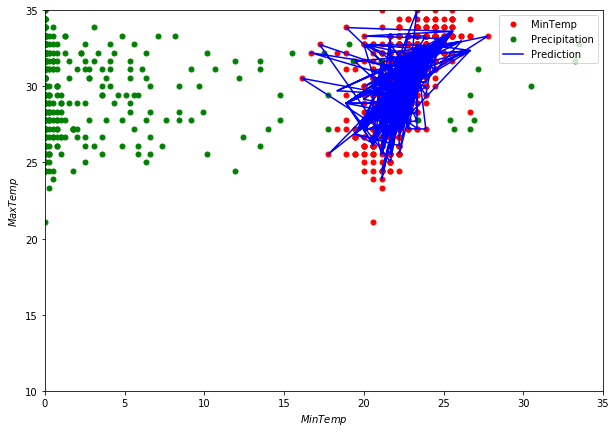

In [12]:
# Gaussian doesn't like values below 0 !!!
plt.figure(figsize=[10,7])

plt.plot(X_train[:,0], y_train, 'r.', markersize=10, label='MinTemp')
plt.plot(X_train[:,1], y_train, 'g.', markersize=10, label='Precipitation')
plt.plot(X_train[:,0], y_predT, 'b-', label='Prediction')
#plt.plot(X_train[:,1], y_train, 'y-', markersize=10, label='Prediction2')
#plt.fill(np.concatenate([X, X[::-1]]),
#         np.concatenate([y_pred - 1.9600 * sigma,
#                       (y_pred + 1.9600 * sigma)[::-1]]),
#         alpha=.5, fc='b', ec='None')
#         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$MinTemp$')
plt.ylabel('$MaxTemp$')
plt.ylim(10, 35)
plt.xlim(0, 35)
plt.legend(loc='upper right')

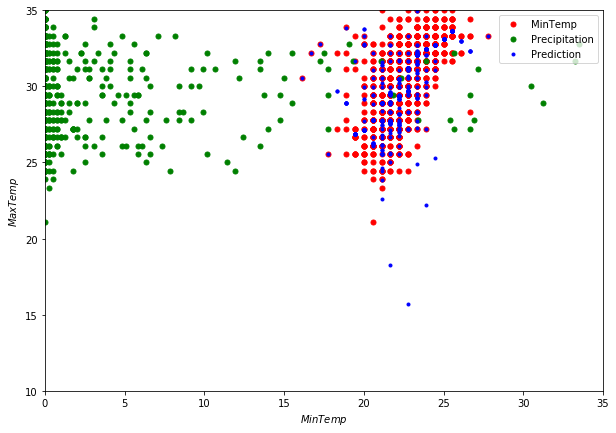

In [13]:
# Gaussian doesn't like values below 0 !!!
plt.figure(figsize=[10,7])

plt.plot(X[:,0], y, 'r.', markersize=10, label='MinTemp')
plt.plot(X[:,1], y, 'g.', markersize=10, label='Precipitation')
plt.plot(X[:,0], y_pred, 'b.', label='Prediction')
#plt.plot(X_train[:,1], y_train, 'y-', markersize=10, label='Prediction2')
#plt.fill(np.concatenate([X, X[::-1]]),
#         np.concatenate([y_pred - 1.9600 * sigma,
#                       (y_pred + 1.9600 * sigma)[::-1]]),
#         alpha=.5, fc='b', ec='None')
#         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$MinTemp$')
plt.ylabel('$MaxTemp$')
plt.ylim(10, 35)
plt.xlim(0, 35)
plt.legend(loc='upper right')

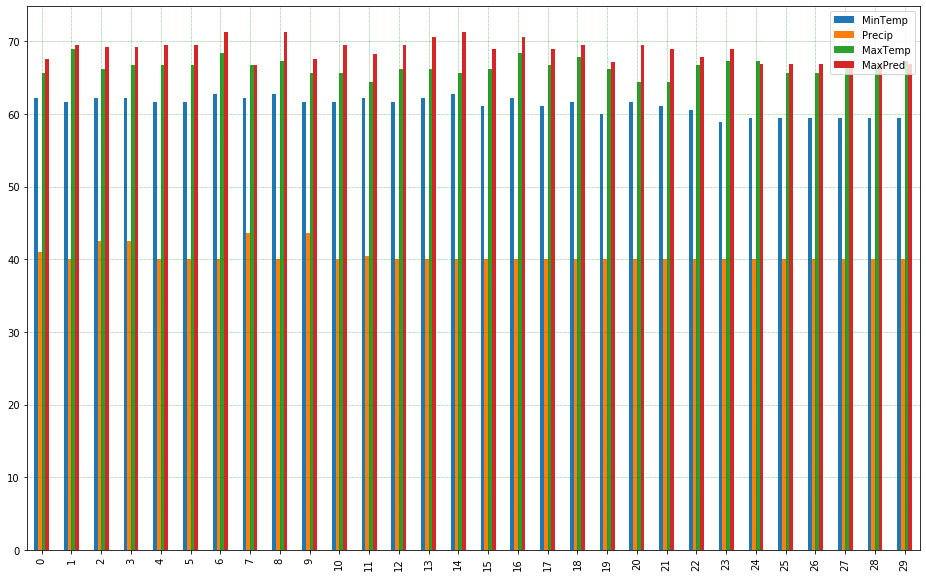

In [40]:
df3 = dfnew.head(30) + 40
df3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [15]:
print (y_pred)

[27.57157447 29.4993408  29.16309008 ... 29.95719435 31.2087716
 30.5049131 ]


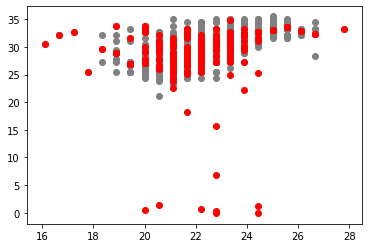

In [47]:
plt.scatter(X[:,0], y,  color='gray')
#plt.plot(X[:,0], y_pred, color='red', linewidth=1)
plt.scatter(X[:,0], y_pred, color='red')
plt.show()


<function matplotlib.pyplot.show>

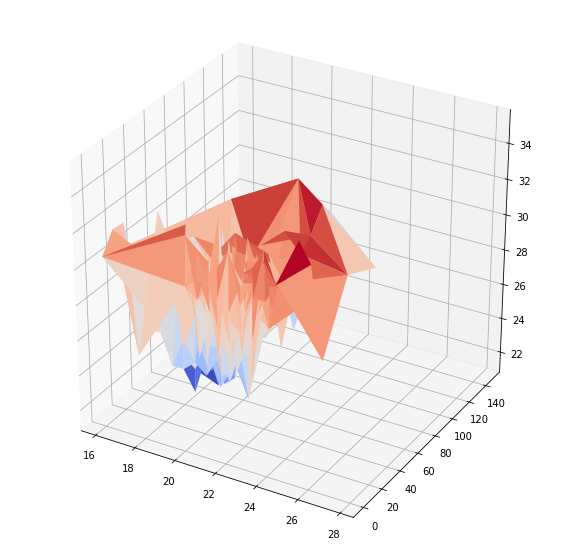

In [17]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df['MinTemp'], df['Precip'],df['MaxTemp'], cmap = cm.coolwarm, linewidth=0.2)
plt.show

In [9]:
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from pyod.models.knn import KNN   # kNN detector

#X1 = df.values[0,:]
X1 = df[['MinTemp','MaxTemp']].values

y1 = np.zeros(X1.shape[0], dtype=np.int)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

print (X1_train.shape)
print (y1_train.shape)

# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X1_train)

# get the prediction labels and outlier scores of the training data
y1_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y1_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y1_test_pred = clf.predict(X1_test)  # outlier labels (0 or 1)
y1_test_scores = clf.decision_function(X1_test)  # outlier scores



/home/markus/.local/lib/python3.7/site-packages/numba/errors.py:131: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


(925, 2)
(925,)


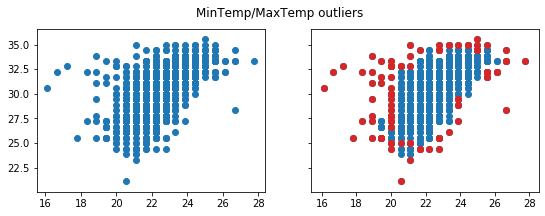

In [10]:
y1_pred = clf.predict(X1)

dfA = df.copy()
dfA['prediction'] = y1_pred

#dfA.plot(x='X1', y='y1', style='o',figsize=(10,7))
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

axs[0].scatter(dfA['MinTemp'], dfA['MaxTemp'], color='tab:blue')

axs[1].scatter(dfA['MinTemp'], dfA['MaxTemp'], color='tab:blue')
dfB = dfA[~(dfA['prediction'] == 0)]
axs[1].scatter(dfB['MinTemp'], dfB['MaxTemp'], color='tab:red')

fig.suptitle('MinTemp/MaxTemp outliers')  
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0          0.0
1          1.0
2          2.0
3          3.0
4          4.0
5          5.0
6          6.0
7          7.0
8          8.0
9          9.0
10        10.0
11        11.0
12        12.0
13        13.0
14        14.0
15        15.0
16        16.0
17        17.0
18        18.0
19        19.0
20        20.0
21        21.0
22        22.0
23        23.0
24        24.0
25        25.0
26        26.0
27        27.0
28        28.0
29        29.0
         ...  
1127    1128.0
1128    1129.0
1129    1130.0
1130    1131.0
1131    1132.0
1132    1133.0
1133    1134.0
1134    1135.0
1135    1136.0
1136    1137.0
1137    1138.0
1138    1139.0
1139    1140.0
1140    1141.0
1141    1142.0
1142    1143.0
1143    1144.0
1144    1145.0
1145    1146.0
1146    1147.0
1147    1148.0
1148    1149.0
1149    1150.0
1150    1151.0
1151    1152.0
1152    1153.0
1153    1154.0
1154    1155.0
1155    1156.0
1156    1157.0
Name: Date, Length: 1157, dtype: float64
(1157, 3)


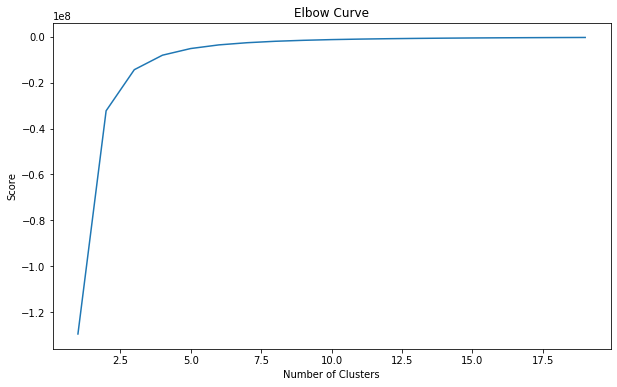

In [11]:
from sklearn.cluster import KMeans
data = dft[['MinTemp', 'MaxTemp']]
data['Date'] = pd.to_numeric(pd.to_datetime(dft['Date'])) / 86400000000000 + 10046
print (data['Date'])
print (data.shape)

n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

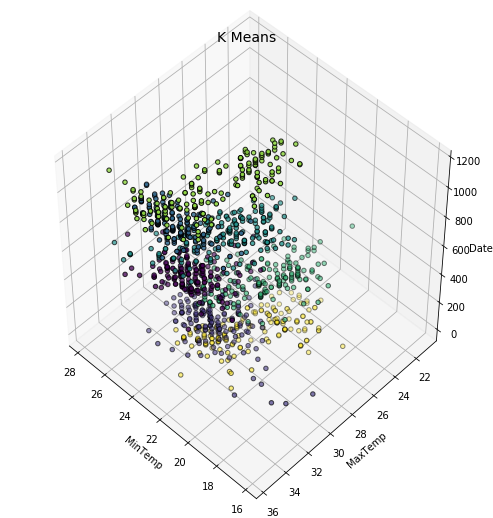

In [12]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
X = data.copy()
X = X.reset_index(drop=True)
km = KMeans(n_clusters=7)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("MinTemp")
ax.set_ylabel("MaxTemp")
ax.set_zlabel("Date")
plt.title("K Means", fontsize=14);